In [1]:
%reload_ext jupyter-rdfify

In [2]:
# This is a placeholder cell for test initialization. Ignore it.

**This is a bonus sheet. The points you acquire in this sheet will count towards your exam admission but the sheet will not affect the total needed for the admission. Even if you already have your admission, we highly recommend working on this sheet as its content is relevant for the exam.**

**If you have never worked with JSON before, it is highly recommended to learn it before working with JSON-LD. It is a very simple format and nicely explained [here](https://www.json.org/json-en.html).**

The extension will treat everything on a line after "###" as comment but this is **not** JSON syntax!

**Only edit cells with "### YOUR SOLUTION HERE". Any points lost because other cells were edited will not be restored.**

## Reminder: Prefixes

As there was a lot of confusion concerning prefixes and CURIEs in the last exercises, here is a small reminder to prevent further errors.

Let's say we have the three URIs &lt;http://example.org/#Rick&gt;, &lt;http://example.org/#Morty&gt; and &lt;http://example.org/#Character&gt;. Now we can use them in a Turtle graph as is:

**&lt;http://example.org/#Rick&gt; a &lt;http://example.org/#Character&gt; .  
&lt;http://example.org/#Morty&gt; a &lt;http://example.org/#Character&gt; .**

This is hard to read and has a lot of repetition. As all three URIs begin with &lt;http://example.org/#&gt;, we can abbreviate them using prefixes. So we define a prefix and label it **ex:**. This gives us a much more readable graph:

**PREFIX ex: &lt;http://example.org/#&gt;  
ex:Rick a ex:Character .  
ex:Morty a ex:Character .**

**Some tips:**
- **Try to always define them by hand. There were a lot of errors caused by copy and pasting wrong prefixes.**
- **Check for typos! URIs are case sensitive and the tests only pass for an exact match.**
- **The pound symbol (#) is part of the URI! &lt;http://example.org/Rick&gt; and &lt;http://example.org/#Rick&gt; are completely different URIs.**
- **Prefixes do not change the graph! You don't have to use them if you don't want to.**

**The cell below will define some prefixes which you may use in this entire sheet. Please note that these will only work in Turtle.**

In [3]:
%%rdf turtle --prefix
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

Turtle: Stored prefix.


# JSON-LD

JSON-LD is a W3C recommended RDF graph serialization format. It uses the wide spread JavaScript Object Notation (JSON) format.

For more information on JSON-LD please consult the lecture slides (Linked Data Basics, Lecture 2b) or the [JSON-LD W3C recommendation](https://www.w3.org/TR/json-ld/)

## Task 1: Understanding JSON-LD [3 points]
Consider the following RDF graph in JSON-LD format (run the cell to get a visualisation):

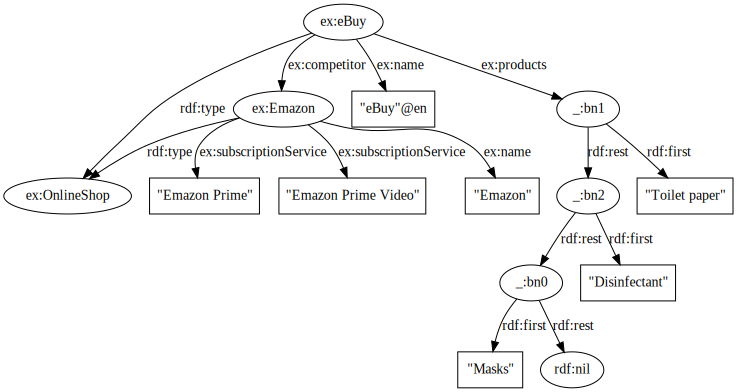

In [4]:
%%rdf json-ld -d graph
{
    "@context": {
        "ex": "http://example.org/shops#",
        "xsd": "http://www.w3.org/2001/XMLSchema#"
    },
    "@id": "ex:eBuy",
    "@type": "ex:OnlineShop",
    "ex:name": {
        "@value": "eBuy",
        "@language": "en"
    },
    "ex:products": {
        "@list": [
            "Toilet paper",
            "Disinfectant",
            "Masks"
        ]
    },
    "ex:competitor": {
        "@id": "ex:Emazon",
        "@type": "ex:OnlineShop",
        "ex:name": "Emazon",
        "ex:subscriptionService": [
            "Emazon Prime",
            "Emazon Prime Video"
        ]
    }
}

Create an identical graph using Turtle notation in the cell below.

**Please make sure that your prefixes are correct.**  
**Tip: Run the cell and compare the graphs. They should be identical up to prefix renaming.**

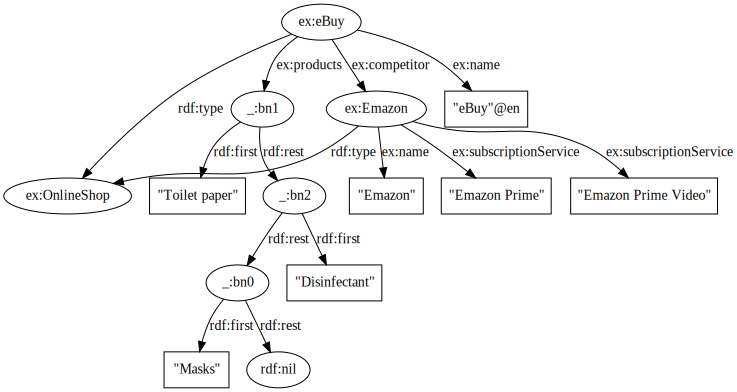

In [5]:
%%rdf turtle -d graph -l shops

@prefix ex: <http://example.org/shops#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:eBuy a ex:OnlineShop ;
    ex:name "eBuy"@en ;
    ex:products ( "Toilet paper" "Disinfectant" "Masks" ) ;
    ex:competitor ex:Emazon .
    
ex:Emazon a ex:OnlineShop ;
    ex:name "Emazon" ;
    ex:subscriptionService "Emazon Prime", "Emazon Prime Video" .

In [6]:
# This test will check whether you modelled eBuy correctly [1.5 points]

In [7]:
# This test will check whether you modelled Emazon correctly [1.5 points]

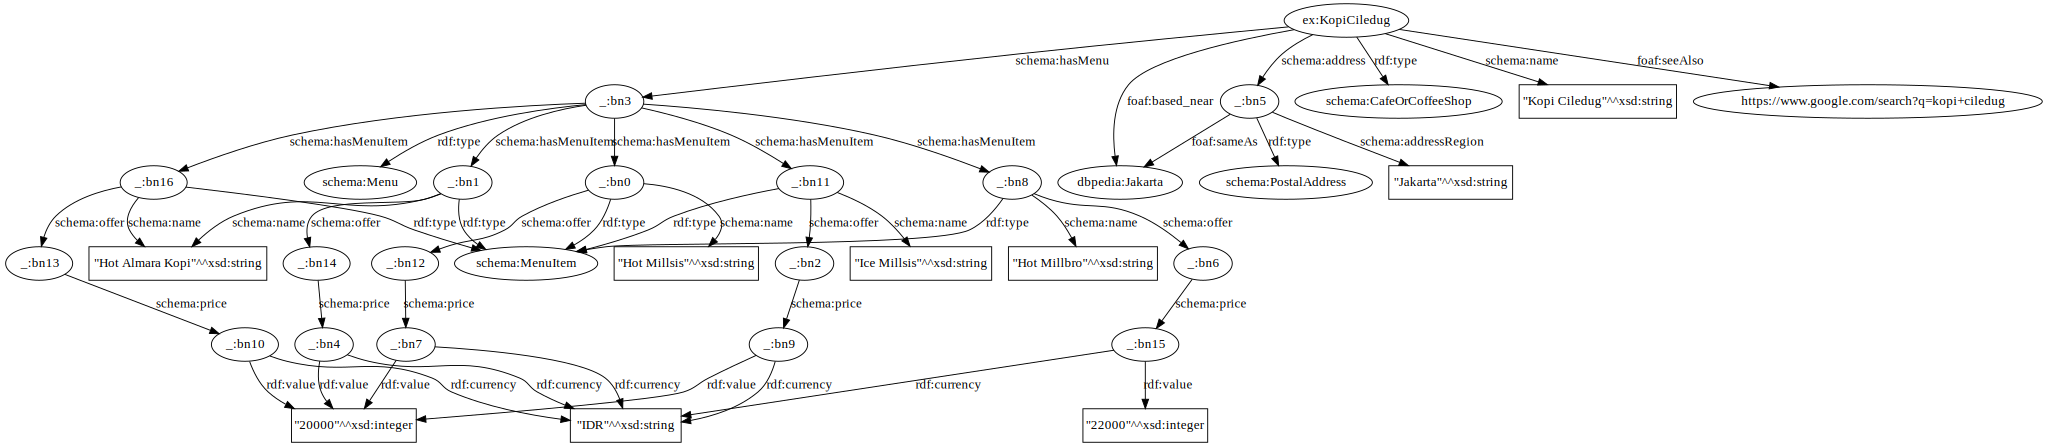

In [8]:
%%rdf turtle -l gofood

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://example.org/>.
@prefix schema: <http://schema.org/>.

@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix dbpedia: <http://dbpedia.org/resource/> .

ex:KopiCiledug a schema:CafeOrCoffeeShop ;
    schema:name "Kopi Ciledug"^^xsd:string ;
    foaf:based_near dbpedia:Jakarta ;
    foaf:seeAlso <https://www.google.com/search?q=kopi+ciledug> ;

    schema:address [
        a schema:PostalAddress ;
        schema:addressRegion "Jakarta"^^xsd:string ;
        foaf:sameAs dbpedia:Jakarta ;
    ] ;

    schema:hasMenu [
        a schema:Menu ;
        schema:hasMenuItem [
            a schema:MenuItem ;
            schema:name "Hot Almara Kopi"^^xsd:string ;
            schema:offer [
                schema:price [
                    rdf:value "20000"^^xsd:integer ;
                    rdf:currency "IDR"^^xsd:string ;
                ] ;
            ];
        ] ;
        
        schema:hasMenuItem [
            a schema:MenuItem ;
            schema:name "Hot Almara Kopi"^^xsd:string ;
            schema:offer [
                schema:price [
                    rdf:value "20000"^^xsd:integer ;
                    rdf:currency "IDR"^^xsd:string ;
                ] ;
            ];
        ] ;

        schema:hasMenuItem [
            a schema:MenuItem ;
            schema:name "Hot Millsis"^^xsd:string ;
            schema:offer [
                schema:price [
                    rdf:value "20000"^^xsd:integer ;
                    rdf:currency "IDR"^^xsd:string ;
                ] ;
            ];
        ] ;

        schema:hasMenuItem [
            a schema:MenuItem ;
            schema:name "Ice Millsis"^^xsd:string ;
            schema:offer [
                schema:price [
                    rdf:value "20000"^^xsd:integer ;
                    rdf:currency "IDR"^^xsd:string ;
                ] ;
            ];
        ] ;
        
        schema:hasMenuItem [
            a schema:MenuItem ;
            schema:name "Hot Millbro"^^xsd:string ;
            schema:offer [
                schema:price [
                    rdf:value "22000"^^xsd:integer ;
                    rdf:currency "IDR"^^xsd:string ;
                ] ;
            ];
        ] ;
    ] .



In [9]:
%%rdf json-ld -d graph -l kopiCiledug

{
    "@context": {
        "ex": "http://example.org/",
        "schema": "http://schema.org/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "owl": "http://www.w3.org/2002/07/owl#",
        "foaf": "http://xmlns.com/foaf/0.1/",
        "dbpedia": "http://dbpedia.org/resource/"
    },
    "@id": "ex:KopiCiledug",
    "@type": "schema:CafeOrCoffeeShop",
    "schema:name": "Kopi Ciledug",
    "foaf:based_near": "dbpedia:Jakarta",
    "foaf:seeAlso": "https://www.google.com/search?q=kopi+ciledug",

    "schema:address": {
        "@type": "schema:PostalAddress",
        "schema:addressRegion": "Jakarta",
        "foaf:sameAs": "dbpedia:Jakarta"
    },
    
    "schema:hasMenu": {
        "@type": "schema:Menu",
        "schema:hasMenuItem": [
            {
                "@type": "schema:MenuItem",
                "schema:name": "Hot Almara Kopi",
                "schema:offer": {
                    "schema:price": {
                        "rdf:value": 20000,
                        "rdf:datatype": "xsd:integer"
                        "rdf:currency": {
                            "rdf:value": "IDR",
                            "rdf:datatype": "xsd:string"
                        }
                    }
                }
            },
            {
                "@type": "schema:MenuItem",
                "schema:name": "Hot Almara Kopi",
                "schema:offer": {
                    "schema:price": {
                        "rdf:value": 20000,
                        "rdf:currency": {
                            "rdf:value": "IDR",
                            "rdf:datatype": "xsd:string"
                        }
                    }
                }
            },
            {
                "@type": "schema:MenuItem",
                "schema:name": "Hot Millsis",
                "schema:offer": {
                    "schema:price": {
                        "rdf:value": 20000,
                        "rdf:currency": {
                            "rdf:value": "IDR",
                            "rdf:datatype": "xsd:string"
                        }
                    }
                }
            },
            {
                "@type": "schema:MenuItem",
                "schema:name": "Ice Millsis",
                "schema:offer": {
                    "schema:price": {
                        "rdf:value": 20000,
                        "rdf:currency": "IDR"
                    }
                }
            },
            {
                "@type": "schema:MenuItem",
                "schema:name": "Hot Millbro",
                "schema:offer": {
                    "schema:price": {
                        "rdf:value": 22000,
                        "rdf:currency": "IDR"
                    }
                }
            }
        ]
    }
}

Could not parse json-ld graph:<br>Expecting ',' delimiter: line 33 column 25 (char 1181)
JSON-LD: Parse failed:



## Task 2: JSON-LD Person [4 points]

Consider the following RDF graph in Turtle format:

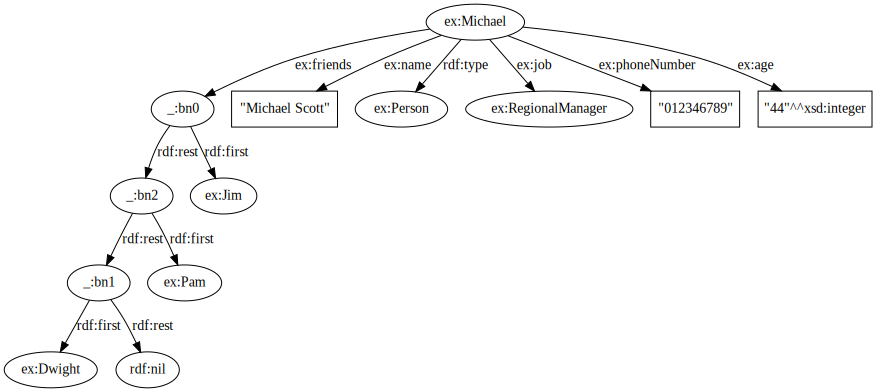

In [10]:
%%rdf turtle -d graph

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX ex: <http://example.org/#>

ex:Michael a ex:Person ;
    ex:name "Michael Scott" ;
    ex:job ex:RegionalManager ;
    ex:phoneNumber "012346789" ;
    ex:age "44"^^xsd:integer ;
    ex:friends (ex:Jim ex:Pam ex:Dwight) .

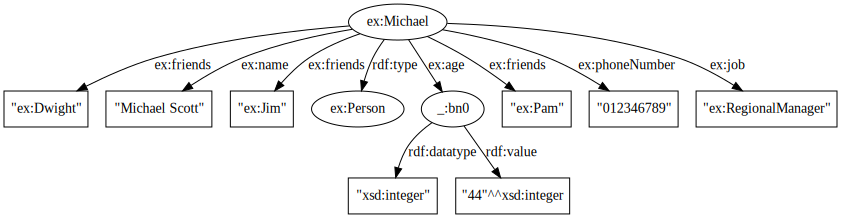

In [28]:
%%rdf json-ld -d graph -l office

{
    "@context": {
        "ex": "http://example.org/#",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "xsd": "http://www.w3.org/2001/XMLSchema#"
    },
    "@id": "ex:Michael",
    "@type": "ex:Person",
    "ex:name": "Michael Scott",
    "ex:job": "ex:RegionalManager",
    "ex:phoneNumber": "012346789",
    "ex:age": {
        "rdf:value": 44,
        "rdf:datatype": "xsd:integer"
    },
    "ex:friends": [
        "ex:Jim",
        "ex:Pam",
        "ex:Dwight"
    ]
}

Create the same graph using JSON-LD.  
**Please note the difference between URIs and literals e.g. ex:Professor vs "ex:Professor"**

In [12]:
# This test will check whether your node has the correct type. [1 point]

In [13]:
# This test will check whether your literals are correct. [1 point]

In [14]:
# This test will check whether your friendlist is correct. [1 point]

In [15]:
# This test will check whether your other triples are correct. [1 point]

## Task 3: Blank Nodes & Reification [2 points]
Model the following in JSON-LD using RDF reification.

Peralta knows that Terry loves joghurt.

Use the following URIs:  
Peralta: **http://example.org/#Peralta**  
knows: **http://example.org/#knows**  
Terry: **http://example.org/#Terry**  
loves: **http://example.org/#loves**  
Joghurt: **http://example.org/#Joghurt**  

You may need the RDF vocabulary prefix: **http://www.w3.org/1999/02/22-rdf-syntax-ns#**

In [16]:
%%rdf json-ld -d graph -l 99

{
    "@context": {
        "ex": "http://example.org/#",
        "xsd": "http://www.w3.org/2001/XMLSchema#"
    },
    "@id": "ex:Peralta",
    "@type": "ex:Person",
    "ex:name": "Peralta",
    "ex:knows": {
        "@id": "ex:knows",
        "@type": "ex:Statement",
        "ex:subject": {
            "@id": "ex:Peralta"
        },
        "ex:predicate": {
            "@id": "ex:knows"
        },
        "ex:object": {
            "@id": "ex:Terry"
        }x
}

Could not parse json-ld graph:<br>Expecting ',' delimiter: line 21 column 10 (char 468)
JSON-LD: Parse failed:



In [17]:
# This test will check whether you modelled the blank node correctly. [1 point]

In [18]:
# This test will check whether you modelled the reification correctly. [1 point]

## Task 4: Multiple Graphs, Multiple Properties And Multiple Languages [3 points]
Consider the following RDF graph in Turtle format:

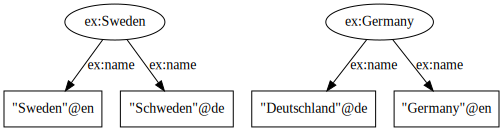

In [19]:
%%rdf turtle -d graph
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX ex: <http://example.org/#>

ex:Germany ex:name "Deutschland"@de, "Germany"@en .
ex:Sweden ex:name "Schweden"@de, "Sweden"@en .

Create an identical graph using JSON-LD.

In [20]:
%%rdf json-ld -d graph -l multi
{
    ### YOUR SOLUTION HERE
}

In [21]:
# This test will check whether you modelled multiple disconnected graphs. [1 point]

In [22]:
# This test will check whether you modelled multiple name properties correctly. [1 point]

In [23]:
# This test will check whether you modelled multiple languages correctly. [1 point]